In [125]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("nvda_stock_data.csv")

In [126]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,59.687500,59.977501,59.180000,59.977501,59.741245,23753600
1,2020-01-03,58.775002,59.457500,58.525002,59.017502,58.785023,20538400
2,2020-01-06,58.080002,59.317501,57.817501,59.264999,59.031548,26263600
3,2020-01-07,59.549999,60.442501,59.097500,59.982498,59.746220,31485600
4,2020-01-08,59.939999,60.509998,59.537498,60.095001,59.858280,27710800
...,...,...,...,...,...,...,...
1087,2024-04-29,875.950012,879.919983,852.659973,877.570007,877.570007,38897100
1088,2024-04-30,872.400024,888.190002,863.000000,864.020020,864.020020,36370900
1089,2024-05-01,850.770020,860.000000,812.549988,830.409973,830.409973,55986300
1090,2024-05-02,844.489990,862.369995,832.000000,858.169983,858.169983,37789800


In [127]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,59.687500,59.977501,59.180000,59.977501,59.741245,23753600
1,2020-01-03,58.775002,59.457500,58.525002,59.017502,58.785023,20538400
2,2020-01-06,58.080002,59.317501,57.817501,59.264999,59.031548,26263600
3,2020-01-07,59.549999,60.442501,59.097500,59.982498,59.746220,31485600
4,2020-01-08,59.939999,60.509998,59.537498,60.095001,59.858280,27710800


In [128]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1087,2024-04-29,875.950012,879.919983,852.659973,877.570007,877.570007,38897100
1088,2024-04-30,872.400024,888.190002,863.000000,864.020020,864.020020,36370900
1089,2024-05-01,850.770020,860.000000,812.549988,830.409973,830.409973,55986300
1090,2024-05-02,844.489990,862.369995,832.000000,858.169983,858.169983,37789800
1091,2024-05-03,877.890015,892.809998,870.400085,887.830017,887.830017,39834072


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1092 non-null   object 
 1   Open       1092 non-null   float64
 2   High       1092 non-null   float64
 3   Low        1092 non-null   float64
 4   Close      1092 non-null   float64
 5   Adj Close  1092 non-null   float64
 6   Volume     1092 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 59.8+ KB


In [130]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1.092000e+03
mean,254.334991,259.101096,249.356678,254.482093,254.270355,4.682122e+07
std,190.789638,194.100961,186.902226,190.612159,190.685090,1.869374e+07
min,50.025002,52.485001,45.169998,49.099998,48.935833,9.788400e+06
25%,132.953754,134.927505,130.639996,133.048748,132.740437,3.431215e+07
50%,187.599998,191.900002,183.885002,187.995003,187.759239,4.470295e+07
75%,297.559990,304.597504,288.080002,295.994987,295.573479,5.692440e+07
max,958.510010,974.000000,935.099976,950.020020,950.020020,1.543911e+08


In [131]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

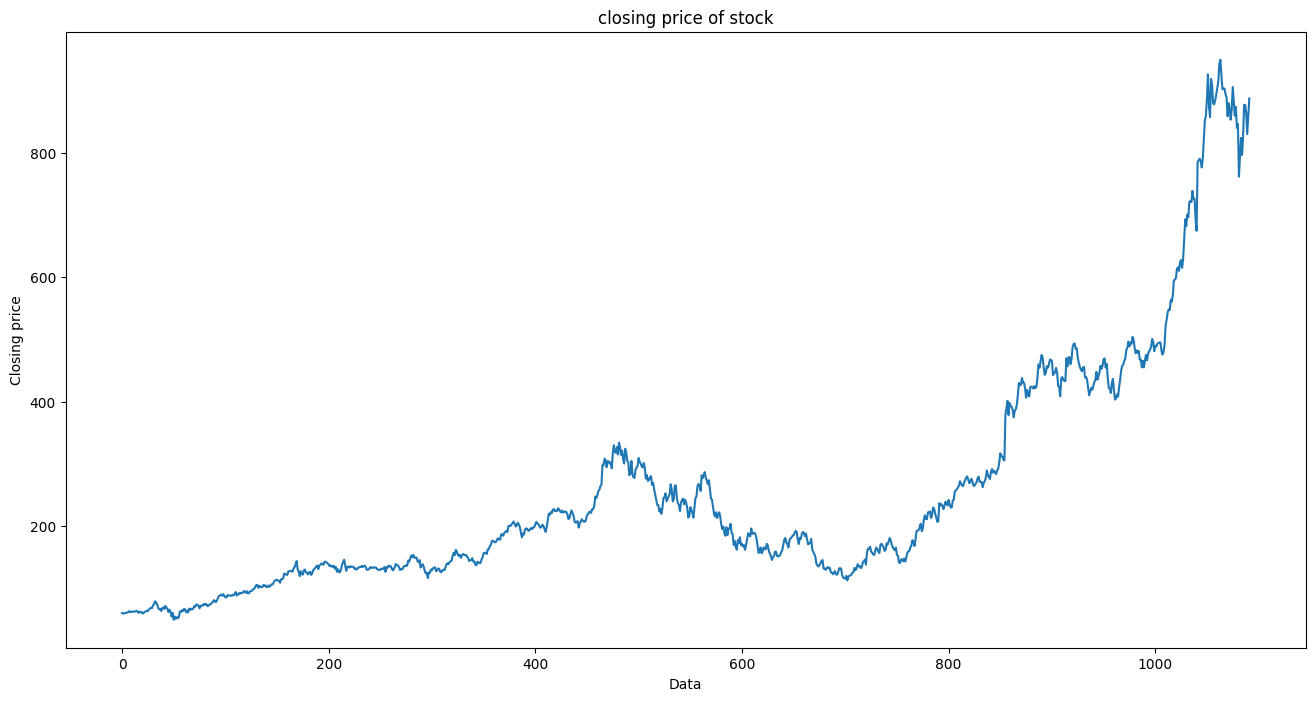

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.title('closing price of stock')
plt.plot(df['Close'])
plt.xlabel('Data')
plt.ylabel('Closing price')
plt.show()

In [133]:
for i in range(len(df['Date'])):
    s = ''.join(df['Date'][i].split("-"))
    df['Date'][i] = int(s)

df['Date'] = df['Date'].astype('int64')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1092 non-null   int64  
 1   Open       1092 non-null   float64
 2   High       1092 non-null   float64
 3   Low        1092 non-null   float64
 4   Close      1092 non-null   float64
 5   Adj Close  1092 non-null   float64
 6   Volume     1092 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 59.8 KB


In [135]:
x = df.copy().drop(columns=['Open'],axis=1)
y = df.copy()[['Open']]

from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

x = scale.fit_transform(x,y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [136]:
print("x_train shape before reshaping :", x_train.shape)
print("y_train shape before reshaping :", y_train.shape)
print("x_test shape before reshaping :", x_test.shape)
print("y_test shape before reshaping :", y_test.shape)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

print("x_train shape after reshaping :", x_train.shape)
print("x_test shape after reshaping :", x_test.shape)

x_train shape before reshaping : (873, 6)
y_train shape before reshaping : (873, 1)
x_test shape before reshaping : (219, 6)
y_test shape before reshaping : (219, 1)
x_train shape after reshaping : (873, 6, 1)
x_test shape after reshaping : (219, 6, 1)


In [137]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,ELU,PReLU
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(LSTM(32,return_sequences=True, activation=ELU(), input_shape = (x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=True, activation=ELU()))
model.add(LSTM(128,return_sequences=True, activation=ELU()))
model.add(LSTM(128,return_sequences=True, activation=ELU()))
model.add(LSTM(256,return_sequences=True, activation=ELU()))
model.add(LSTM(256,return_sequences=True, activation=ELU()))
model.add(LSTM(512,return_sequences=True, activation=ELU()))
model.add(LSTM(512,return_sequences=False, activation=ELU()))
model.add(Dense(256, activation=ELU()))
model.add(Dense(256, activation=ELU()))
model.add(Dense(128, activation=ELU()))
model.add(Dense(64, activation=ELU()))
model.add(Dense(32, activation=ELU()))
model.add(Dense(1, activation='linear'))

model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss',verbose=1, save_best_only=True, mode='min')

model.compile(optimizer='nadam', loss='mean_squared_error')

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_69 (LSTM)                  │ (None, 6, 32)          │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_70 (LSTM)                  │ (None, 6, 64)          │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_71 (LSTM)                  │ (None, 6, 128)         │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_72 (LSTM)                  │ (None, 6, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_73 (LSTM)                  │ (None, 6, 256)         │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_74 (LSTM)                  │ (None, 6, 256)         │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_75 (LSTM)                  │ (None, 6, 512)         │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_76 (LSTM)                  │ (None, 512)            │     2,099,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,093,633 (19.43 MB)

 Trainable params: 5,093,633 (19.43 MB)

 Non-trainable params: 0 (0.00 B)

In [138]:
history = model.fit(x_train, y_train,epochs=150, batch_size=25, verbose=1, validation_data=(x_test,y_test), callbacks= model_checkpoint)

Epoch 1/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 89753.9844
Epoch 1: val_loss improved from inf to 27480.73438, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 16s 171ms/step - loss: 88963.0312 - val_loss: 27480.7344
Epoch 2/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 28967.7500
Epoch 2: val_loss improved from 27480.73438 to 2413.10498, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - loss: 28642.7969 - val_loss: 2413.1050
Epoch 3/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 2544.6167
Epoch 3: val_loss improved from 2413.10498 to 2412.37964, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - loss: 2544.7004 - val_loss: 2412.3796
Epoch 4/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 2397.8054
Epoch 4: val_loss improved from 2412.37964 to 2276.29321, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - loss: 2401.7639 - val_loss: 2276.2932
Epoch 5/150
35/35 ━━━━━━━━━

In [139]:
x = df.copy().drop(columns=['Close'],axis=1)
y = df.copy()[['Close']]

scale = MinMaxScaler()

x = scale.fit_transform(x,y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)

In [140]:
print("x_train shape before reshaping :", x_train.shape)
print("y_train shape before reshaping :", y_train.shape)
print("x_test shape before reshaping :", x_test.shape)
print("y_test shape before reshaping :", y_test.shape)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

print("x_train shape after reshaping :", x_train.shape)
print("x_test shape after reshaping :", x_test.shape)

x_train shape before reshaping : (819, 6)
y_train shape before reshaping : (819, 1)
x_test shape before reshaping : (273, 6)
y_test shape before reshaping : (273, 1)
x_train shape after reshaping : (819, 6, 1)
x_test shape after reshaping : (273, 6, 1)


In [141]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,ELU,PReLU
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(LSTM(32,return_sequences=True, activation=ELU(), input_shape = (x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=True, activation=ELU()))
model.add(LSTM(128,return_sequences=True, activation=ELU()))
model.add(LSTM(128,return_sequences=True, activation=ELU()))
model.add(LSTM(256,return_sequences=True, activation=ELU()))
model.add(LSTM(256,return_sequences=True, activation=ELU()))
model.add(LSTM(512,return_sequences=True, activation=ELU()))
model.add(LSTM(512,return_sequences=False, activation=ELU()))
model.add(Dense(256, activation=ELU()))
model.add(Dense(256, activation=ELU()))
model.add(Dense(128, activation=ELU()))
model.add(Dense(64, activation=ELU()))
model.add(Dense(32, activation=ELU()))
model.add(Dense(1, activation='linear'))

model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss',verbose=1, save_best_only=True, mode='min')

model.compile(optimizer='nadam', loss='mean_squared_error')

model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_77 (LSTM)                  │ (None, 6, 32)          │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_78 (LSTM)                  │ (None, 6, 64)          │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_79 (LSTM)                  │ (None, 6, 128)         │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_80 (LSTM)                  │ (None, 6, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_81 (LSTM)                  │ (None, 6, 256)         │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_82 (LSTM)                  │ (None, 6, 256)         │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_83 (LSTM)                  │ (None, 6, 512)         │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_84 (LSTM)                  │ (None, 512)            │     2,099,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,093,633 (19.43 MB)

 Trainable params: 5,093,633 (19.43 MB)

 Non-trainable params: 0 (0.00 B)

In [142]:
history = model.fit(x_train, y_train,epochs=150, batch_size=25, verbose=1, validation_data=(x_test,y_test), callbacks= model_checkpoint)

Epoch 1/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 93422.6875
Epoch 1: val_loss improved from inf to 28757.22070, saving model to best_model.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 177ms/step - loss: 92520.5938 - val_loss: 28757.2207
Epoch 2/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 27974.8848
Epoch 2: val_loss improved from 28757.22070 to 2895.72876, saving model to best_model.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - loss: 27562.1172 - val_loss: 2895.7288
Epoch 3/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 3554.5039
Epoch 3: val_loss improved from 2895.72876 to 2248.93530, saving model to best_model.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - loss: 3543.1912 - val_loss: 2248.9353
Epoch 4/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 2477.8616
Epoch 4: val_loss did not improve from 2248.93530
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - loss: 2484.0471 - val_loss: 2462.3132
Epoch 5/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 2683.71